In [ ]:
import numpy as np
from NN.models import Basic as NetMu
from NN.models import BasicSP as NetSigma
from NNMuSigmaEst.Net import MuNet
from NNMuSigmaEst.Net import SigmaNet

from NN.trainer import AlternatingTrainer as AltTrain
from misc import sortedplot as sp

from misc.randomSort import randomSort
import tensorflow as tf



In [ ]:
from NNMuSigmaEst.debug import Debug
n_units = 10
n_hidden = 5
dropout_rate = 0.2
rounds =  10
batch_size = 500
maxIter = 50
netMu = NetMu(n_units, n_hidden, dropout_rate)
netSigma = NetSigma(n_units, n_hidden, dropout_rate)
netMu.build((None,1))
netSigma.build((None,1))
muNet = MuNet(netMu)
sigmaNet = SigmaNet(netSigma)
n = 1000
x = np.random.uniform(size=(n,1))*10
mu = x
sigmaSq = x**3
y = mu +  np.sqrt(sigmaSq)*np.random.normal(loc = 0, scale = 1, size=(n,1))
w = np.ones((n,1))
debug = Debug(x,y, w, mu, sigmaSq)
trainer = AltTrain(muNet, sigmaNet, x, y, w, rounds, maxIter, batch_size)
trainer.attachDebugger(debug)
trainer.fit()

In [ ]:
sp.scatter(x, netMu.predict(x))
#sp.scatter(x, netSigma.predict(x))
sp.scatter(x, mu)
from misc.randomSort import randomSort#sp.scatter(x, sigmaSq)

In [ ]:
from data.datagen import GaussianDG

alpha = 0.5
n_p = 50
n_u = 50
mu = -1
sig = 1
dg = GaussianDG(mu=mu, sig=sig, alpha=alpha, n_p=n_p, n_u=n_u)
#x contains the one dimensional feature. y contains the PU labels (1: positive, 0:unlabeled) and y_p contains 
#the labels of all positives including the one in the unlabeled set
n = 2000
[x,y] = dg.pn_data(n, alpha)


#PN posterior. This is what we want to estimate
#sp.sortedplot() sorts the inputs w.r.t the x coordinate before plotting
sp.sortedplot(x, dg.pn_posterior_cc(x))
sp.sortedplot(x, dg.dens_neg(x))
sp.sortedplot(x, dg.dens_pos(x))
sp.hist(x[(y==0).flatten(),:], bins=20, density=True)
sp.hist(x[(y==1).flatten(),:], bins=18, density=True)
sp.show()

In [ ]:
from misc.randomSort import randomSort
#from MonotonicPosterior.model import MonotonicPosteriorNet as PostNet
from NN.models import BasicSP as PostNet
from NN.trainer import Trainer as PostTrainer
from MonotonicPosterior.Net import MontonicPosteriorNetBCE2 as PostNetBCE 
from MonotonicPosterior.debug import Debug as PostDebug
n_units = 10

n_hidden = 5
dropout_rate = 0.2
rounds =  10
batch_size = 500
maxIter = 1000
# The neural network containing the monotonic posterior parameters
pNet = PostNet(n_units, n_hidden, dropout_rate)
pNet.build((None,1))

#tf.executing_eagerly()


# n = 1000
# x0 = np.random.normal(size=(n,1))
# x1 = 2 + np.random.normal(size=(n,1))
# x = np.concatenate((x1,x0), axis=0)
# w1 = np.concatenate((np.ones((n,1)), np.zeros((n,1))), axis =0)
w1 = y
w0 = 1-w1
[x, ix] = randomSort(x)
w1 = w1[ix,:]
w0 = w0[ix, :]
# The neural network containing the posterior network and also gives the loss and corresponding gradients
pNetBCE = PostNetBCE(pNet,x,w1,w0)

debug = PostDebug()
debug.attachTarget(x, dg.pn_posterior(x, alpha))

trainer = PostTrainer(pNetBCE, x, w1, w0, maxIter, batch_size)
trainer.attachDebugger(debug)
trainer.fit()

In [ ]:
from misc.randomSort import randomSort
aa = np.searchsorted(postNet.x.flatten(), postNet.x.flatten(), side='right')
np.unique(aa)
#np.unique(postNet.x.flatten()).shape

In [ ]:
sp.sortedplot(x,pNetBCE.posterior(x))
sp.sortedplot(x, dg.pn_posterior(x, alpha))
#preSigmoid=np.cumsum(postNet.net.predict(x), axis=0)/(2*n)
#sp.sortedplot(x,tf.keras.activations.sigmoid(preSigmoid).numpy())
sp.hist(x[(w1==1).flatten(),:], bins=20, density=True)
sp.hist(x[(w0==1).flatten(),:], bins=18, density=True)
sp.ylim([0,1])

In [ ]:
trainer.fit()


In [ ]:
trainer = PostTrainer(pNetBCE, x, w1, w0, 1000, batch_size)
trainer.attachDebugger(debug)
trainer.fit()

In [ ]:
qq = np.ones((2,2))

In [ ]:
qq.flatten()

In [ ]:
np.cumsum(np.arange(10))

In [ ]:
np.searchsorted(np.arange(10), 8.9, side='right')
np.where(np.arange(10)+1>=10)

In [ ]:
aa = np.ones((3,1))
aa[0:3,:]

In [ ]:
aa =np.arange(4)

In [ ]:
aa[1:-1]

In [ ]:
ll=tf.keras.losses.BinaryCrossentropy()

In [ ]:
ll(np.ones((10,1)),np.ones((10,1)))

In [ ]:
np.where(np.arange(4)>2,np.arange(4)+2,1)

In [ ]:
a=1
'iteration'+ str(a)

In [ ]:
netPost.Dens[0]

In [ ]:
pNetBCE.net.trainable_variables[21]


In [ ]:
debug.plotPosteriorFit()
len(debug.nets)

In [ ]:
sp.show()

In [ ]:
import matplotlib
matplotlib.use('TkAgg')
debug.fig.show()

In [ ]:
from IPython.display import display
display(debug.fig)

In [ ]:
fig, axs = sp.subplots(2,2)

In [ ]:
axs[0,0].plot(np.arange(9))
sp.show()
display(fig)

In [ ]:
fig.show()

In [ ]:
debug.fig.show()

In [ ]:
0/0


In [ ]:
np.divide(0.0,0.0)

In [ ]:
np.any([0,0])


In [ ]:
np.arange(1, 9.5, 1)

In [ ]:
a = np.array([[1.0, 1], [2, 2], [3, 3]])
b = a.flatten()
bb = np.insert(b, [2, 2], [7.13, False]) # type casting



In [ ]:
bb=np.append(bb,8)

In [ ]:
bb[-1]

In [ ]:
np.sum(np.ones((3,3)), axis =0)

In [ ]:
from MonotonicPosterior.fit import PosteriorFitting
PosteriorFitting.demo()

In [ ]:
qimport os

# Get the current Conda environment name
conda_env = os.getenv("CONDA_DEFAULT_ENV")
print(f"Current Conda environment: {conda_env}")

In [ ]:
conda_prefix = os.getenv("CONDA_PREFIX")
print(f"Current Conda environment path: {conda_prefix}")

In [ ]:
import sys
print("Python path:")
for path in sys.path:
    print(path)

In [ ]:
import tensorflow as tf

In [ ]:
import sys
print(f"Jupyter is using: {sys.executable}")

In [ ]:
import os
print(os.getenv("PYTHONPATH"))

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
#import tensorflow_probability as tfp
import pdb
# Define the model
width = 10
rate = 0.0
model = Sequential([
    Dense(width, activation='relu', input_shape=(1,)),
    BatchNormalization(),
    Dropout(rate=rate),
    Dense(width, activation='relu'),
    BatchNormalization(),
    Dropout(rate=rate),
    Dense(width, activation='relu'),
    BatchNormalization(),
    Dropout(rate=rate),
    Dense(width, activation='relu'),
    BatchNormalization(),
    Dropout(rate=rate),
    Dense(width, activation='relu'),
    BatchNormalization(),
    Dropout(rate=rate),
    Dense(1, activation='sigmoid')  # Single neuron for binary classification
])

bce  = tf.keras.losses.BinaryCrossentropy()
# class BinaryCrossEntropy(tf.keras.losses.Loss):
#     def __init__(self):
#         super().__init__()

#     def call(self, y_true, y_pred):
#         loss = bce(y_true,y_pred)
#         return loss

class BinaryCrossEntropy(tf.keras.losses.Loss):
    def __init__(self, reduction=tf.keras.losses.Reduction.AUTO, name="BinaryCrossEntropy"):
        super().__init__(reduction=reduction, name=name)

    def call(self, y_true, y_pred):
        y_pred = tf.reshape(y_pred, [-1])
        y_true = tf.reshape(y_true,[-1])
        loss = tf.keras.losses.binary_crossentropy(y_true, y_pred)
        #first_difference = y_pred[1:] - y_pred[:-1]
        #loss_monotonicity = tf.keras.activations.relu(-first_difference)
        #loss_monotonicity = tf.reduce_sum(loss_monotonicity)
        #loss = loss_bce + 10*loss_monotonicity
        #loss = tf.keras.losses.binary_crossentropy(y_true, y_pred) 
        #loss = bce(y_true, y_pred)
        #loss = bce(tf.reshape(y_true,[-1]), tf.reshape(y_pred, [-1]))
        #pdb.set_trace()
        #loss = loss + 100*loss_monotonicity
        return loss

# def binaryCrossEntropy(y_true, y_pred):
#     bce  = tf.keras.losses.BinaryCrossentropy()
#     loss = bce(y_true,y_pred)
#     return loss

# def binaryCrossEntropyAndMonotonicity(y_true, posterior):
#     bce  = tf.keras.losses.BinaryCrossentropy()
#     loss = bce(y_true,posterior)
#     diff = tf.diff(posterior)
#     loss_monotonicity = tf.keras.activations.relu(-diff)
#     loss = loss + loss_monotonicity
#     return loss

# Compile the model
model.compile(optimizer='adam', 
              loss=BinaryCrossEntropy(),  # Appropriate for binary classification
              #loss='binary_crossentropy',  # Appropriate for binary classification
              metrics=['accuracy'])


In [37]:
from data.datagen import GaussianDG
alpha = 0.5
n_p = 50
n_u = 50
mu = -1
sig = 2
dg = GaussianDG(mu=mu, sig=sig, alpha=alpha, n_p=n_p, n_u=n_u)
n = 20000
[X, y] = dg.pn_data(n, alpha)
posterior = dg.pn_posterior_cc(X)

In [38]:
from tensorflow.keras.callbacks import ModelCheckpoint
#from tensorflow.keras.callbacks import TensorBoard

#tensorboard_callback = TensorBoard(log_dir='logs', histogram_freq=1)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
checkpoint = ModelCheckpoint(
    'best_model.h5',          # Filepath to save the model
    monitor='val_loss',       # Metric to monitor
    save_best_only=True,      # Save only the best model
    mode='min'                # Minimize the validation loss
)
# Train the model
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=200, 
                    batch_size=500,
                    callbacks=[checkpoint])


Epoch 1/200


2024-12-26 17:26:43.441398: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - ETA: 0s - loss: 0.9516 - accuracy: 0.3935 

2024-12-26 17:26:44.738172: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 2s 27ms/step - loss: 0.9516 - accuracy: 0.3935 - val_loss: 1.2045 - val_accuracy: 0.3983
Epoch 2/200
32/32 [==============================] - 1s 16ms/step - loss: 0.9156 - accuracy: 0.3593 - val_loss: 1.2539 - val_accuracy: 0.4018
Epoch 3/200
32/32 [==============================] - 0s 15ms/step - loss: 0.6808 - accuracy: 0.5733 - val_loss: 1.1094 - val_accuracy: 0.4185
Epoch 4/200
32/32 [==============================] - 0s 13ms/step - loss: 0.6907 - accuracy: 0.5634 - val_loss: 1.1920 - val_accuracy: 0.3893
Epoch 5/200
32/32 [==============================] - 0s 12ms/step - loss: 0.7175 - accuracy: 0.3953 - val_loss: 1.4103 - val_accuracy: 0.3923
Epoch 6/200
32/32 [==============================] - 0s 13ms/step - loss: 0.6790 - accuracy: 0.5507 - val_loss: 1.0980 - val_accuracy: 0.4023
Epoch 7/200
32/32 [==============================] - 0s 14ms/step - loss: 0.6728 - accuracy: 0.5524 - val_loss: 0.8123 - val_accuracy: 0.4868
Epoch 8/200
32/32 

 18/625 [..............................] - ETA: 1s  

2024-12-26 17:28:10.898204: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 19/625 [..............................] - ETA: 1s  

2024-12-26 17:28:12.815268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 2s 2ms/step


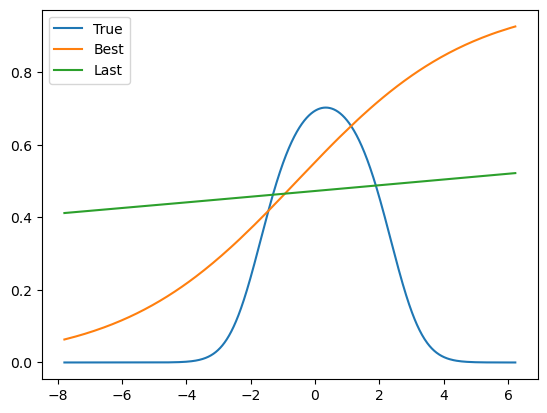

In [39]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import custom_object_scope

with custom_object_scope({'BinaryCrossEntropy': BinaryCrossEntropy}):
    best_model = load_model('best_model.h5')

from misc import sortedplot as sp
sp.sortedplot(X,posterior, label="True")
sp.sortedplot(X,best_model.predict(X), label="Best")
sp.sortedplot(X,model.predict(X), label="Last")
sp.legend()

In [ ]:
import numpy as np 
val_loss = history.history['val_loss']
train_loss = history.history['loss']
sp.plot(val_loss)
sp.plot(train_loss)

In [ ]:
import tensorflow as tf
import datetime

# Log directory
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
file_writer = tf.summary.create_file_writer(log_dir)


In [3]:
from sklearn.model_selection import train_test_split
from data.datagen import GaussianDG

alpha = 0.5
n_p = 50
n_u = 50
mu = -1
sig = 2
dg = GaussianDG(mu=mu, sig=sig, alpha=alpha, n_p=n_p, n_u=n_u)
n = 5000
[X, y] = dg.pn_data(n, alpha)
posterior = dg.pn_posterior_cc(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Example data
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout


class MonotonicPosterior(Sequential):
    def __init__(self, width, num_layers, dropout_rate=0.0):
        Layers = []
        for i in np.arange(num_layers):
            Layers.append(Dense(width, activation='relu'))
            #Layers.append(BatchNormalization())
            #Layers.append(Dropout(rate=dropout_rate))
        Layers.append(Dense(1, activation='sigmoid'))
        super(MonotonicPosterior, self).__init__(Layers)
        self.width = width
        self.num_layers = num_layers
        self.dropout_rate = dropout_rate
        self.loss_tracker = keras.metrics.Mean(name="loss")
        self.mse_metric = keras.metrics.MeanSquaredError(name="mse")
        self.build(input_shape=(None, 1))
        #pdb.set_trace()

    def loss_monotonicity(self, x, y_pred):
        ix = tf.argsort(x)
        y_pred = tf.gather(y_pred, ix)
        diff = y_pred[:-1]-y_pred[1:]
        loss_monotonicity = tf.reduce_sum(tf.keras.activations.relu(diff))
        return loss_monotonicity
        

    def compute_loss(self, x,y,y_pred):
        #loss = tf.keras.losses.binary_crossentropy(y, y_pred)
        loss = tf.keras.losses.binary_crossentropy(tf.reshape(y,[-1]), tf.reshape(y_pred, [-1]))
        loss = loss + 0.0*self.loss_monotonicity(x,y_pred)
        return loss


    def train_step(self, data):
        # Unpack the data. Its structure depends on your model and
        # on what you pass to `fit()`.
        x, y = data

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)  # Forward pass
            # Compute the loss value
            # (the loss function is configured in `compile()`)
            loss = self.compute_loss(x=x, y=y, y_pred=y_pred)

        # Compute gradients
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))
        # Update metrics (includes the metric that tracks the loss)
        for metric in self.metrics:
            if metric.name == "loss":
                metric.update_state(loss)
            else:
                metric.update_state(y, y_pred)
        # Return a dict mapping metric names to current value
        return {m.name: m.result() for m in self.metrics}
        

    def test_step(self, data):
        # Unpack the data
        x, y = data
        # Compute predictions
        y_pred = self(x, training=False)
        # Updates the metrics tracking the loss
        loss = self.compute_loss(x=x, y=y, y_pred=y_pred)
        # Update the metrics.
        for metric in self.metrics:
            if metric.name == "loss":
                metric.update_state(loss)
            else:
                metric.update_state(y, y_pred)
        # Return a dict mapping metric names to current value.
        # Note that it will include the loss (tracked in self.metrics).
        return {m.name: m.result() for m in self.metrics}
        
    def get_config(self):
        config = super(MonotonicPosterior, self).get_config()
        config.update({
            "width": self.width,
            "num_layers": self.num_layers,
            "dropout_rate": self.dropout_rate,
        })
        return config

    @classmethod
    def from_config(cls, config):
        argsMP = ["width","num_layers","dropout_rate"]
        kwargs = {k:config[k] for k in argsMP}
        modelMP = cls(**kwargs)
        [config.pop(k) for k in argsMP]
        #pdb.set_trace()
        modelSeq = Sequential.from_config(config)
        for layerSeq, layerMP in zip(modelSeq.layers, modelMP.layers):
            layerMP.set_weights(layerSeq.get_weights())
        return modelMP
    @property
    def metrics(self):
        # We list our `Metric` objects here so that `reset_states()` can be
        # called automatically at the start of each epoch
        # or at the start of `evaluate()`.
        # If you don't implement this property, you have to call
        # `reset_states()` yourself at the time of your choosing.
        return [self.loss_tracker, self.mse_metric]

    # def call(self, inputs):
    #     x = self.dense1(inputs)
    #     return self.dense2(x)



In [9]:
import pdb
from tensorflow.keras.callbacks import ModelCheckpoint
width = 10
num_layers = 5
model = MonotonicPosterior(width, num_layers)
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3, decay_steps=1000, decay_rate=0.9)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer)
checkpoint = ModelCheckpoint(
    'best_model.h5',          # Filepath to save the model
    monitor='val_loss',       # Metric to monitor
    save_best_only=True,      # Save only the best model
    mode='min'                # Minimize the validation loss
)

history = model.fit(X_train, y_train, batch_size=100, epochs=400,
    validation_data= (X_test, y_test),
    shuffle=True,
    callbacks=[checkpoint])


Epoch 1/400


2024-12-28 14:33:20.075143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 1s 11ms/step - loss: 0.6561 - mse: 0.2327 - val_loss: 0.6428 - val_mse: 0.2270
Epoch 2/400
 9/40 [=====>........................] - ETA: 0s - loss: 0.6484 - mse: 0.2292

2024-12-28 14:33:20.667091: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/shajain/miniforge3/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


40/40 [==============================] - 0s 8ms/step - loss: 0.6517 - mse: 0.2297 - val_loss: 0.6398 - val_mse: 0.2237
Epoch 3/400
40/40 [==============================] - 0s 8ms/step - loss: 0.6532 - mse: 0.2288 - val_loss: 0.6381 - val_mse: 0.2225
Epoch 4/400
40/40 [==============================] - 0s 8ms/step - loss: 0.6537 - mse: 0.2290 - val_loss: 0.6380 - val_mse: 0.2227
Epoch 5/400
40/40 [==============================] - 0s 7ms/step - loss: 0.6572 - mse: 0.2314 - val_loss: 0.6930 - val_mse: 0.2499
Epoch 6/400
40/40 [==============================] - 0s 8ms/step - loss: 0.6731 - mse: 0.2371 - val_loss: 0.6491 - val_mse: 0.2283
Epoch 7/400
40/40 [==============================] - 0s 8ms/step - loss: 0.6678 - mse: 0.2354 - val_loss: 0.6583 - val_mse: 0.2327
Epoch 8/400
40/40 [==============================] - 0s 8ms/step - loss: 0.8289 - mse: 0.2795 - val_loss: 0.7373 - val_mse: 0.2508
Epoch 9/400
40/40 [==============================] - 0s 8ms/step - loss: 0.7959 - mse: 0.2737 -

 83/157 [==============>...............] - ETA: 0s 

2024-12-28 15:18:41.731353: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 83/157 [==============>...............] - ETA: 0s

2024-12-28 15:18:42.317808: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


157/157 [==============================] - 0s 2ms/step


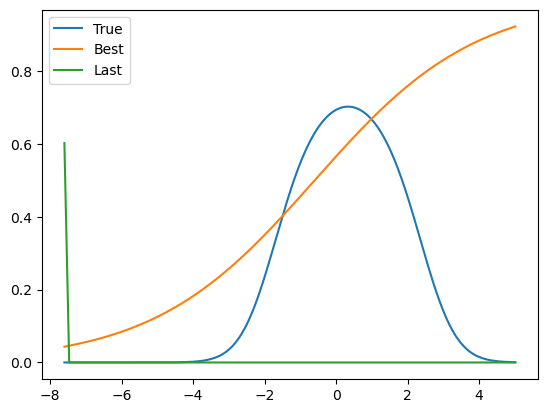

In [10]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import custom_object_scope

#with custom_object_scope({'BinaryCrossEntropy': BinaryCrossEntropy, 'MonotonicPosterior': MonotonicPosterior}):
with custom_object_scope({'MonotonicPosterior': MonotonicPosterior}):
    best_model = load_model('best_model.h5')

from misc import sortedplot as sp
sp.sortedplot(X,posterior, label="True")
sp.sortedplot(X,best_model.predict(X), label="Best")
sp.sortedplot(X,model.predict(X), label="Last")
sp.legend()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define the model class
class BinaryClassifier(nn.Module):
    def __init__(self, input_size):
        super(BinaryClassifier, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 1),
            nn.Sigmoid()  # Output layer for binary classification
        )

    def forward(self, x):
        return self.network(x)

# Generate some synthetic data (for demonstration purposes)
def generate_data(num_samples=1000, input_size=10):
    X = torch.randn(num_samples, input_size)
    y = (torch.sum(X, dim=1) > 0).float().unsqueeze(1)  # Label is 1 if sum > 0, else 0
    return X, y

# Hyperparameters
input_size = 10
learning_rate = 0.001
batch_size = 32
epochs = 10

# Create dataset and data loader
X, y = generate_data(num_samples=1000, input_size=input_size)
dataset = TensorDataset(X, y)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Initialize model, loss function, and optimizer
model = BinaryClassifier(input_size=input_size)
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(epochs):
    for batch_X, batch_y in data_loader:
        # Forward pass
        predictions = model(batch_X)
        loss = criterion(predictions, batch_y)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# Evaluate the model
with torch.no_grad():
    test_X, test_y = generate_data(num_samples=200, input_size=input_size)
    test_predictions = model(test_X)
    test_predictions = (test_predictions > 0.5).float()
    accuracy = (test_predictions == test_y).float().mean()
    print(f"Test Accuracy: {accuracy:.4f}")


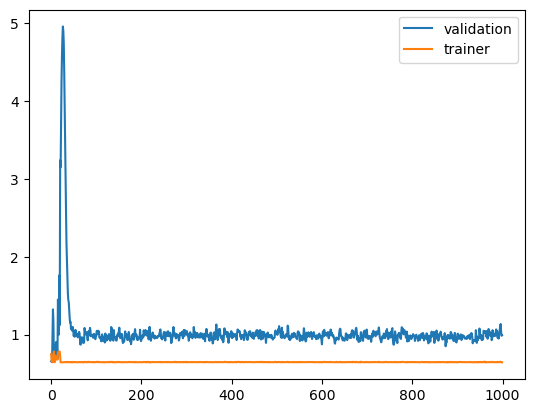

In [47]:
import numpy as np 
val_loss = history.history['val_loss']
train_loss = history.history['loss']
sp.plot(val_loss, label="validation")
sp.plot(train_loss, label="trainer")
sp.legend()

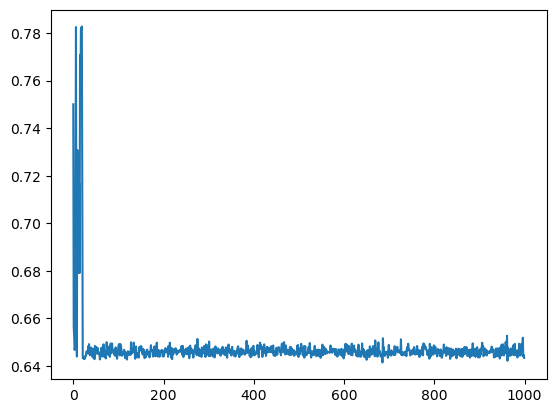

In [48]:
sp.plot(train_loss)

In [ ]:
np.mean((model.predict(X_train)-y_train)**2)

In [ ]:
np.mean((best_model.predict(X)-y)**2)

In [ ]:
# Optimizer and loss function
optimizer = tf.keras.optimizers.Adam()
loss_fn = tf.keras.losses.MeanSquaredError()

# Training loop
epochs = 10
batch_size = 32
steps_per_epoch = len(x_train) // batch_size

for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    epoch_loss = 0

    for step in range(steps_per_epoch):
        # Get a batch
        batch_start = step * batch_size
        batch_end = batch_start + batch_size
        x_batch = x_train[batch_start:batch_end]
        y_batch = y_train[batch_start:batch_end]

        with tf.GradientTape() as tape:
            y_pred = model(x_batch)
            loss = loss_fn(y_batch, y_pred)

        # Compute gradients and update weights
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        epoch_loss += loss.numpy()

    epoch_loss /= steps_per_epoch
    print(f"Loss: {epoch_loss:.4f}")

    # Log loss to TensorBoard
    with file_writer.as_default():
        tf.summary.scalar("loss", epoch_loss, step=epoch)